In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300
pd.set_option('display.max_colwidth',300)

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import sys
sys.setrecursionlimit(100000)

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

/Users/satokosuda/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/satokosuda/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/satokosuda/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/satokosuda/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/satokosuda/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('/Users/satokosuda/new_story_data/dataforcause/dataset.csv')

In [3]:
# Drop text sentence data columns for now because I don't intend text classification at this stage.
data = \
data.drop(['Tent ID','Family Bacgkround','Problems in the Tent - Additional Comments','Do you have any other comments, questions or other information you’d like to add?','Would living in a block home create any changes in your life?','Additional Comments - Health'],axis=1)

In [4]:
# Just for the sake of excercise, let's visualize the distribution of each feature to learn which transformation is apporpriate.
# It's easier to transform all features to center in zero and divided by unit variance (using 'scale' as below). However, we may improve
# algorithm performance by customizing transformation for each feature.

# Also I can try other clustering methods(ideally Euclidian distance models since otherwise I have to redo feature
# engineering to accomodate other models)

In [5]:
data.head()

,# of Tent Residents,# of Years Living in Village,# of Years Living in Tent,How often do you get sick?,"How often do you have friends, family or neighborhoods over to your tent?",HH1 Female,HH1 Male,HH1 Agriculture/Fish,HH1 Contracted Worker,HH1 Driver,HH1 Family Provides,HH1 Laundry / Servant,HH1 Laundry/Housekeeper,HH1 Lesiv/Servant,HH1 Nothing,HH1 Other,HH1 Paid Consistent Job,HH1 Small business outside or nearby the home,HH1 Student,HH1 Vendor,Sleep Length,Number of Residents with Income,Do you normally wake up at night?,Do you ever have trouble staying awake during the day?,Underage kids in the family %,Water Usage (gallon) per resident per day,Children Living Elsewhere No,Children Living Elsewhere Yes,Rent or Own Elsewhere No,Rent or Own Elsewhere Yes,Kids Education No,Kids Education No Response,Kids Education Some,Kids Education Yes,Ownership Other,Ownership Yes,Ownership Rent,Previous Ownership Live with Family,Previous Ownership No Response,Previous Ownership Other,Previous Ownership Own House,Previous Ownership Rent,Marital Status Common Law,Marital Status Married,Marital Status Other,Marital Status Single,Marital Status Widow,Suffer from cough or congestion? No,Suffer from cough or congestion? Yes,Suffer from bronchitis or pneumonia? No,Suffer from bronchitis or pneumonia? Yes,Suffer from diarrhea? No,Suffer from diarrhea? No Response,Suffer from diarrhea? Yes,Do you have access to a latrine? No,Do you have access to a latrine? Yes,Do you have electricity in your tent? No,Do you have electricity in your tent? Yes,Main source of drinking water:Buy,Main source of drinking water:No,Main source of drinking water:Pump or well,"Main source of drinking water:Pump, well, or buy",Do you ever drink water that isn't treated? No Response,Do you ever drink water that isn't treated? No,Do you ever drink water that isn't treated? Yes,Is there any risk that the tent will collapse? No,Is there any risk that the tent will collapse? Yes,In the past year did someone enter your house to steal something? No,In the past year did someone enter your house to steal something? Yes,Do you have space to lie down if tired? No,Do you have space to lie down if tired? Yes,Do people living in the tent have space to keep their personal belongings? No,Do people living in the tent have space to keep their personal belongings? Yes,"In this tent, if someone wakes up, do they wake up the other people? No","In this tent, if someone wakes up, do they wake up the other people? Yes",Do children have safe places to study? No,Do children have safe places to study? Yes,Does your household own any animals? No,Does your household own any animals? Yes,Does your household own a radio? No,Does your household own a radio? Yes,Do you feel safe in your home? No,Do you feel safe in your home? Yes,Do you feel safe leaving your children alone at home? No,Do you feel safe leaving your children alone at home? Yes,Do you feel safe walking in the community at night? No,Do you feel safe walking in the community at night? Yes,Do you own the land the tent is on? No,Do you own the land the tent is on? Yes,"If you were to receive a house, would you be willing to move to the area behind Healing Haiti? No","If you were to receive a house, would you be willing to move to the area behind Healing Haiti? Yes",Do you feel this person qualifies for a home? No,Do you feel this person qualifies for a home? Yes,"What are the dwellings floors made of? Ceramic, wood, concrete",What are the dwellings floors made of? Dirt or soil,What are the dwellings roof made of? Tarp,What are the dwellings roof made of? Tin
0,3,60,7.0,4,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,3,2,0.666667,5.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1

In [6]:
data_scaled = pd.DataFrame(scale(data), columns=data.columns)

/Users/satokosuda/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


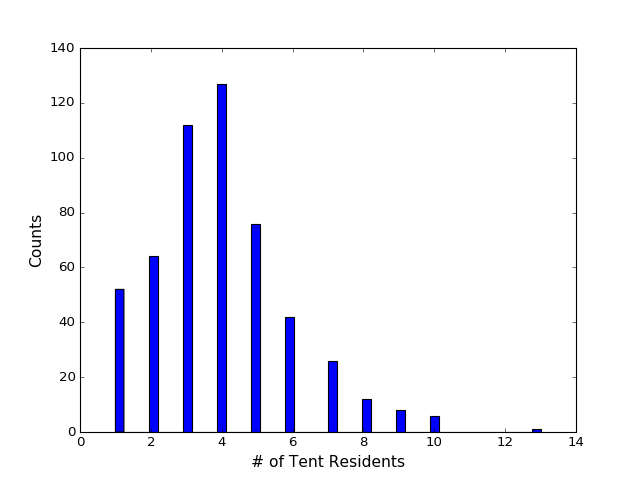

In [17]:
fig, ax = plt.subplots()
data['# of Tent Residents'].plot.hist(ax=ax, bins=50)
ax.set_xlabel('# of Tent Residents', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

<IPython.core.display.Javascript object>


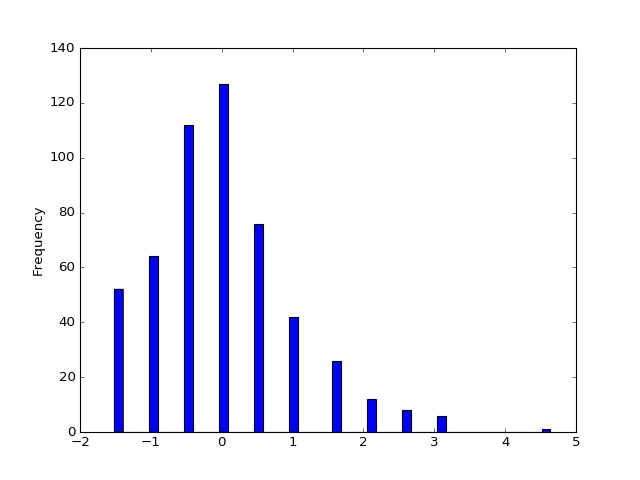

In [18]:
fig9, ax9 = plt.subplots()
data_scaled['# of Tent Residents'].plot.hist(ax=ax9, bins=50)
ax.set_xlabel('# of Tent Residents', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

<IPython.core.display.Javascript object>


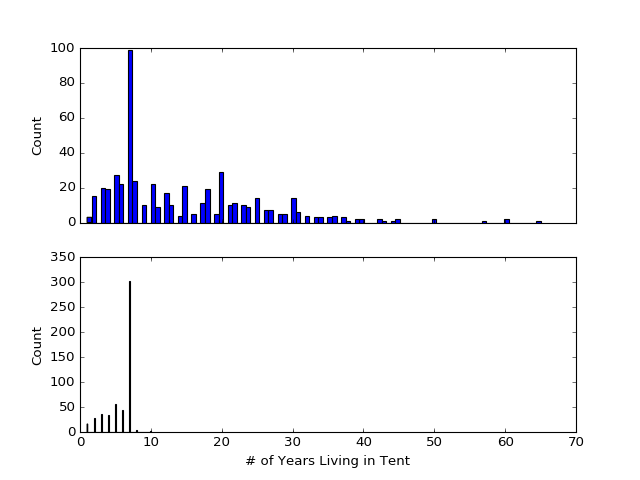

In [19]:
fig2, axes = plt.subplots(2,1, sharex = True)
data['# of Years Living in Village'].plot.hist(ax=axes[0], bins=100)
axes[0].set_xlabel('# of Years Living in Village')
axes[0].set_ylabel('Count')
data['# of Years Living in Tent'].plot.hist(ax=axes[1],bins=100)
axes[1].set_xlabel('# of Years Living in Tent')
axes[1].set_ylabel('Count')

<IPython.core.display.Javascript object>


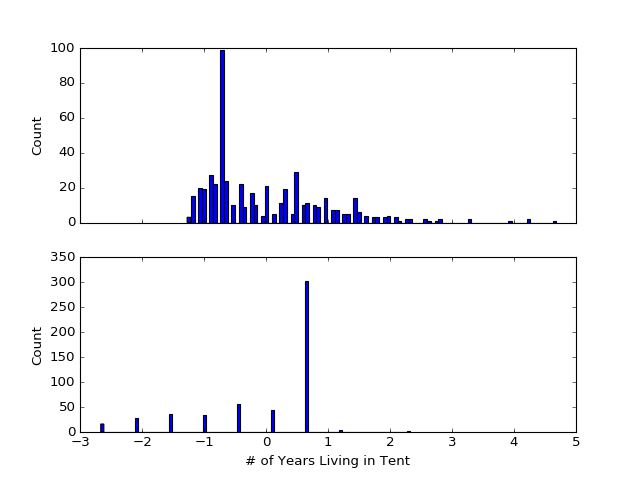

In [20]:
fig10, (axe10_1, axe10_2) = plt.subplots(2,1, sharex = True)
data_scaled['# of Years Living in Village'].plot.hist(ax=axe10_1, bins=100)
axe10_1.set_xlabel('# of Years Living in Village')
axe10_1.set_ylabel('Count')
data_scaled['# of Years Living in Tent'].plot.hist(ax=axe10_2,bins=100)
axe10_2.set_xlabel('# of Years Living in Tent')
axe10_2.set_ylabel('Count')

<IPython.core.display.Javascript object>


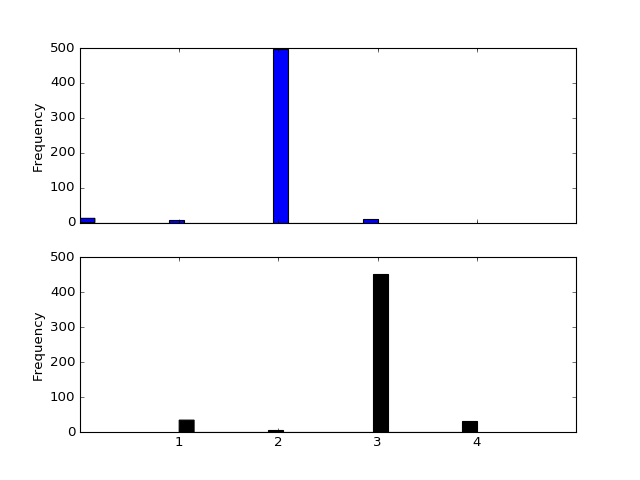

In [21]:
fig3, ax3 = plt.subplots(2,1, sharex=True)
data['How often do you have friends, family or neighborhoods over to your tent?'].plot.hist(ax=ax3[0],bins=20, xlim = [0,4],xticks=[0,1,2,3])
data['How often do you get sick?'].plot.hist(ax=ax3[1],bins=20,xlim=[0,5], xticks=[1,2,3,4], color='k')

<IPython.core.display.Javascript object>


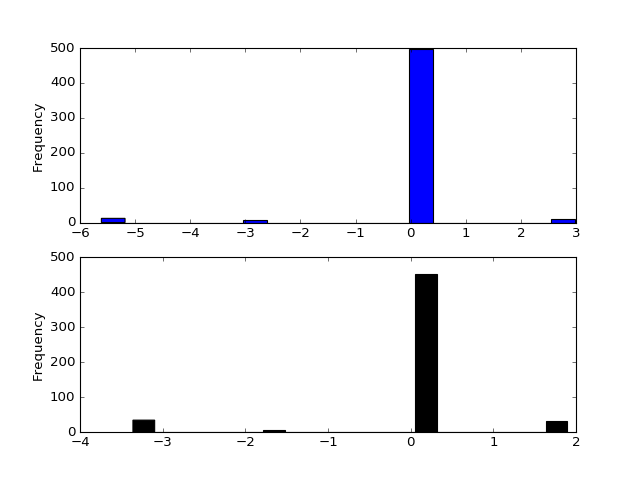

In [22]:
fig11, ax11 = plt.subplots(2,1)
data_scaled['How often do you have friends, family or neighborhoods over to your tent?'].plot.hist(ax=ax11[0],bins=20)
data_scaled['How often do you get sick?'].plot.hist(ax=ax11[1],bins=20,color='k')

In [23]:
index = np.array(data.index)

<IPython.core.display.Javascript object>


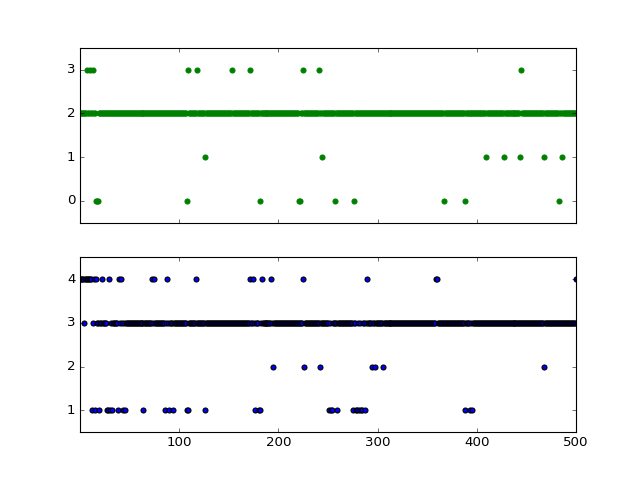

(0, 500)

In [24]:
fig4, axes4 = plt.subplots(2, 1, sharex = True)
axes4[0].scatter(index,data['How often do you have friends, family or neighborhoods over to your tent?'],color='g')
axes4[0].set_xticks([100,200,300,400,500])
axes4[0].set_yticks([0,1,2,3])
axes4[0].set_xlim(0,500)

axes4[1].scatter(index, data['How often do you get sick?'])
axes4[1].set_xticks([100,200,300,400,500])
axes4[1].set_yticks([1,2,3,4])
axes4[1].set_xlim(0,500)

<IPython.core.display.Javascript object>


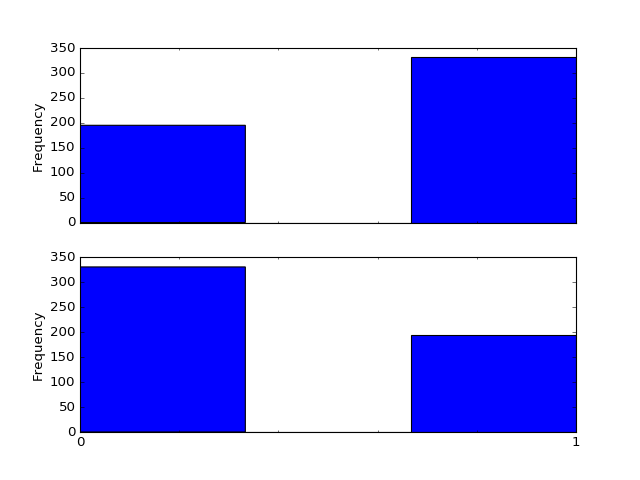

In [25]:
fig5, ax5 = plt.subplots(2,1, sharex=True)
data['HH1 Female'].plot.hist(ax=ax5[0], bins=3, xlim=[0,1], xticks=[0,1])
data['HH1 Male'].plot.hist(ax=ax5[1], bins=3)

<IPython.core.display.Javascript object>


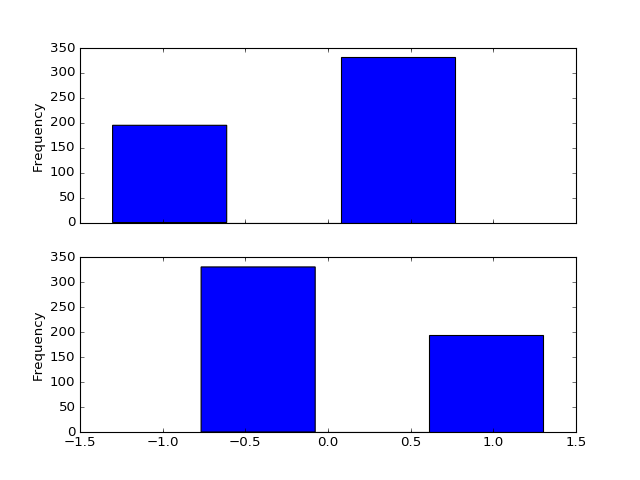

In [26]:
fig12, ax12 = plt.subplots(2,1, sharex=True)
data_scaled['HH1 Female'].plot.hist(ax=ax12[0], bins=3)
data_scaled['HH1 Male'].plot.hist(ax=ax12[1], bins=3)

<IPython.core.display.Javascript object>


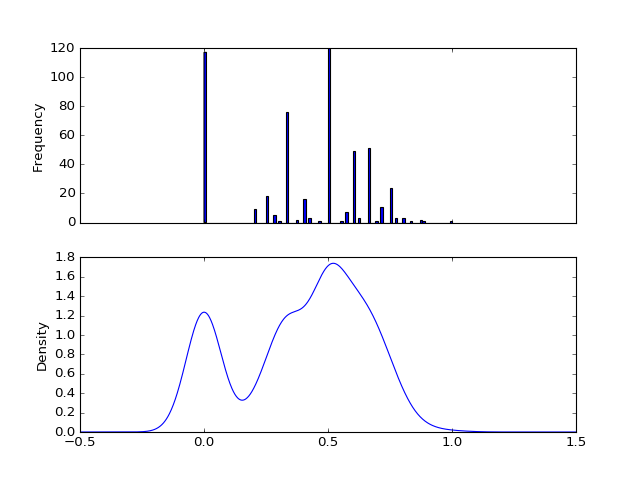

In [27]:
fig6, (ax6_1, ax6_2) = plt.subplots(2,1,sharex=True)
data['Underage kids in the family %'].plot.hist(ax=ax6_1,bins=100)
data['Underage kids in the family %'].plot.density(ax=ax6_2)

<IPython.core.display.Javascript object>


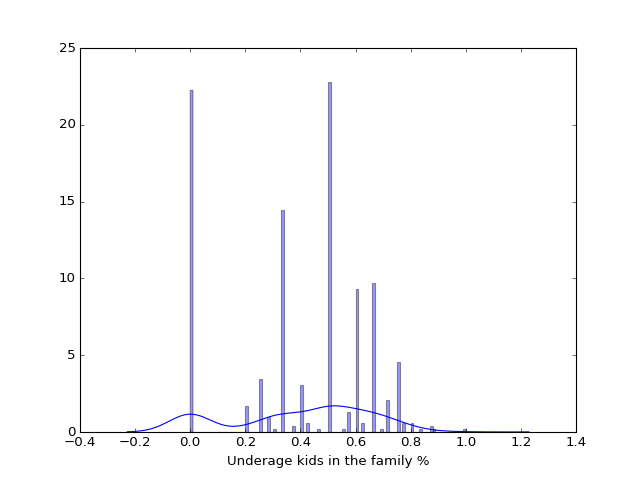

/Users/satokosuda/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [28]:
fig7,ax7 = plt.subplots()
sns.distplot(data['Underage kids in the family %'], bins=100)

<IPython.core.display.Javascript object>


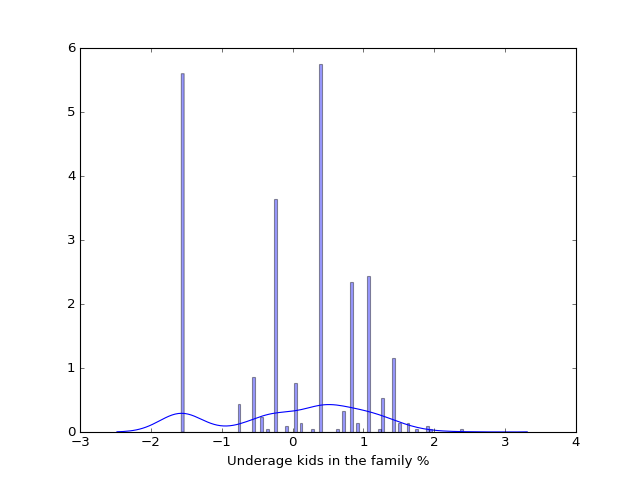

/Users/satokosuda/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [29]:
fig13, ax13=plt.subplots()
sns.distplot(data_scaled['Underage kids in the family %'], bins=100)

<IPython.core.display.Javascript object>


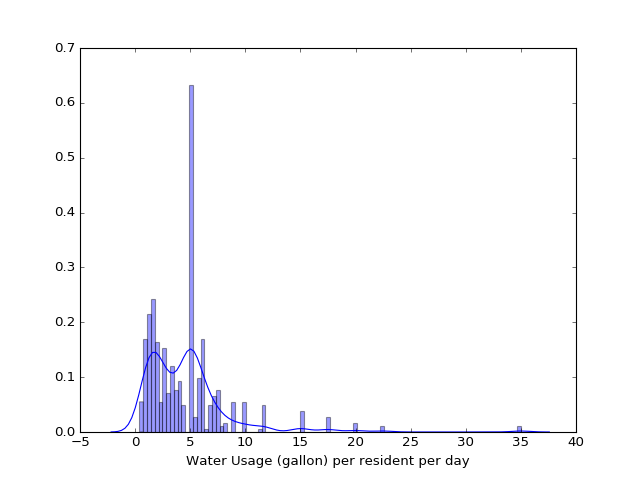

/Users/satokosuda/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [30]:
fig8,ax8=plt.subplots()
sns.distplot(data['Water Usage (gallon) per resident per day'], bins=100)

<IPython.core.display.Javascript object>


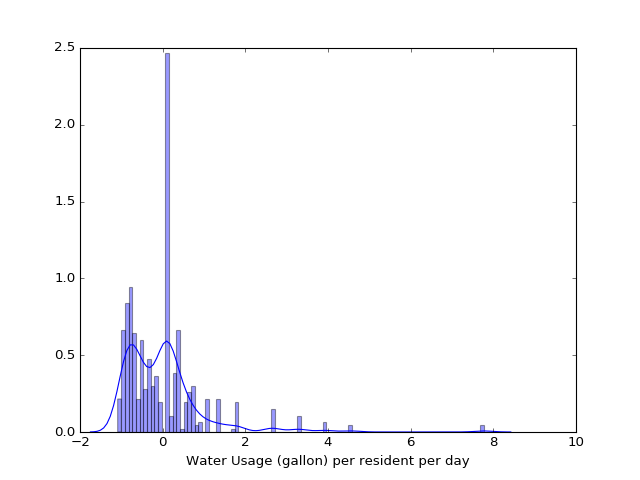

/Users/satokosuda/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [31]:
fig14,ax14 = plt.subplots()
sns.distplot(data_scaled['Water Usage (gallon) per resident per day'], bins=100)
# Scaling preserve the shape of distribution while standardize range in line with other scaled features, thus help
# Euclidean distance based clusters converge nicely.